# Defining system

The default bonding information stored in the code is based on corner-sharing lead halide perovskites. For other perovskite systems, you may need to define the specific bonding information for that system. You can do that by defining a `dict` and pass it to the `system_overwrite` option. The details of how to construct such info is explained in the code piece below. Here we showed an example for a 1D BaTiS3 perovskite structure. 

The code provides a function `system_test` to calculate appropriate values for you, which can be called after the Trajectory object is initialized. 

The bonding information should look like:

<img src="../../examples/system/system_schematic.png"/> 

where the values of each pair `[[a,b], [c,d]]` being:
```
a: lower bound of a range of distance that covers both and only NN1 and NN2
b: upper bound of a range of distance that covers both and only NN1 and NN2
c: NN1 distance of the connected pair
d: NN2 distance of the connected pair
```

------------------------------------------------------------
Loading Trajectory files...
Current sample: test_1D
Time Span: 800.0 ps
Frame count: 40
Reading from frame no.8
Reading every 1 frame(s)
Number of atoms: 640
Temperature: 200K
 
Computing octahedral tilting and distortion...


Progress: 100%|██████████| 32/32 [00:06<00:00,  5.11it/s]


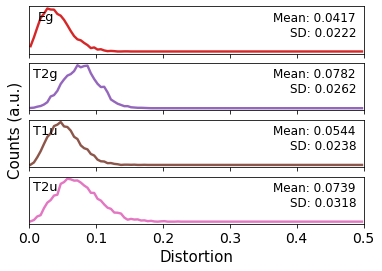

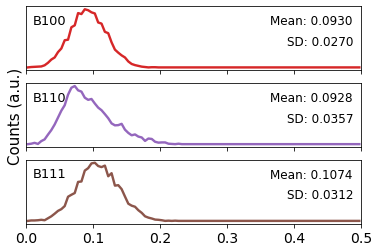

Tilt-Corr-NN1: computing NN1 correlation of tilting in non-3D perovskite structure, all NN1 neighbours are considered the same. 


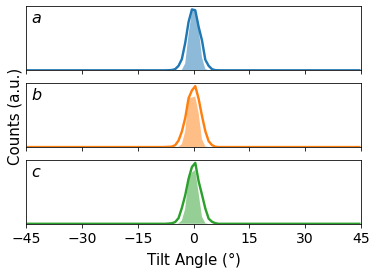

dynamic X-site distortion: [0.0417 0.0782 0.0544 0.0739]
dynamic B-site distortion: [0.093  0.0928 0.1074]
dynamic tilting: [0.15 0.15 0.15]
 
 
--Elapsed Time
Data Reading:          00:00:00
Structure Resolving:   00:00:01
Tilting & Distortion:  00:00:07
Total:                 00:00:07
------------------------------------------------------------


In [7]:
from pdyna.core import Trajectory

MDtup = (200,200,1,20000) # (T_initlal, T_final, timestep, nblock in VASP or equally recording frequency)

new_sys = {'B-sites': ['Ti'],  # The B-site elements in the structure
           'X-sites': ['S'],   # The X-site elements in the structure
           # The next two lines are the bonding information of the structure
           # characteristic value of bond length of your material for structure construction, doesn't have to be very accurate
           # the first interval should be large enough to cover all the first and second NN of B-X (B-B) pairs, 
           # in the second list, the two elements are 0) approximate first NN distance of B-X (B-B) pairs, 
           # and 1) approximate second NN distance of B-X (B-B) pairs
           # These values can be obtained by intuition or inspecting the initial configuration or, e.g. in the pair distrition function of the structure
           # Alternatively, you can use the 'get_bonding_info' function in the 'structure' module to get the bonding information
           'fpg_val_BB': [[1.5,6.3], [2.9,5.8]],  # For the B-B pairs
           'fpg_val_BX': [[0.1,5], [2.4,4.8]],    # For the B-X pairs
           }     

traj = Trajectory("extxyz",("trajetory_1D.extxyz", "init.extxyz", MDtup)) # The inputs for EXTXYZ format are (trajectory file, initial frame file, MDtup)
# The initial frame file is optional, if not provided, the first frame in the trajectory file will be used as the initial frame

traj.dynamics(read_mode= 1,       # equilibration mode 
              uniname="test_1D",  # A unique user-defined name for this trajectory, will be used in printing and figure saving
              allow_equil = 0.2,  # use the entire trajectory
              read_every = 0,     # read every step, 0 is automatic
              
              toggle_tilt_distort = True, # switch of octahedral tilting and distortion calculation
              
              structure_type = 3,   # 1: 3C polytype, 2: other non-perovskite with orthogonal reference enabled, 3: other non-perovskite with initial config as reference             
              multi_thread = 10,    # enable multi-threading in this calculation, since not vectorized
              
              system_overwrite = new_sys,
              )

------------------------------------------------------------
Loading Trajectory files...


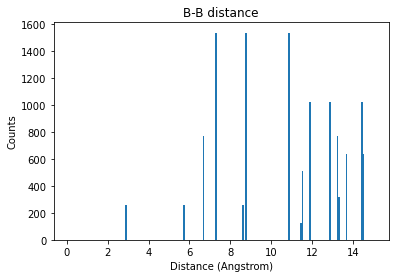

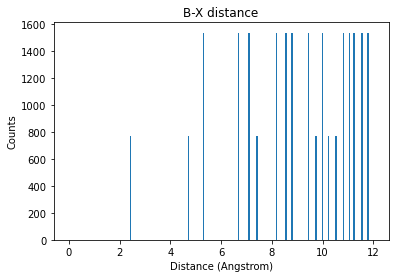

In [6]:
traj = Trajectory("extxyz",("trajetory_1D.extxyz", "init.extxyz", MDtup))
traj.system_test(B_sites=['Ti'],X_sites=['S']) 
# this is a pristine structure where the distribution of B-X and B-B pair distances appeared as sharp peaks, 
# the first two peaks in B-B plot are at 2.9 and 5.8, and those of B-X pairs are 2.4 and 4.8. 
# we highly encourage the users to use pristine inital structure as this will give the most stable fitting, espacially for complicated structrues. 